In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\EXCELR\Assingments\Answers\Multi Linear Regression\ToyotaCorolla.csv")

In [3]:
dataset.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?OYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df = dataset.drop('Model',axis=1)
df = df.drop('Id',axis=1)
df = df.drop('Mfg_Month',axis=1)
df = df.drop('Mfg_Year',axis=1)
df = df.drop('Fuel_Type',axis=1)
df = df.drop('Met_Color',axis=1)
df = df.drop('Color',axis=1)
df = df.drop('Automatic',axis=1)
df = df.drop('Cylinders',axis=1)
df = df.drop('Mfr_Guarantee',axis=1)
df = df.drop('BOVAG_Guarantee',axis=1)
df = df.drop('Guarantee_Period',axis=1)
df = df.drop('ABS',axis=1)
df = df.drop('Airbag_1',axis=1)
df = df.drop('Airbag_2',axis=1)
df = df.drop('Airco',axis=1)
df = df.drop('Automatic_airco',axis=1)
df = df.drop('Boardcomputer',axis=1)
df = df.drop('CD_Player',axis=1)
df = df.drop('Central_Lock',axis=1)
df = df.drop('Powered_Windows',axis=1)
df = df.drop('Power_Steering',axis=1)
df = df.drop('Radio',axis=1)
df = df.drop('Mistlamps',axis=1)
df = df.drop('Sport_Model',axis=1)
df = df.drop('Backseat_Divider',axis=1)
df = df.drop('Metallic_Rim',axis=1)
df = df.drop('Radio_cassette',axis=1)
df = df.drop('Tow_Bar',axis=1)

In [5]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, 0:1].values

In [7]:
X

array([[   23, 46986,    90, ...,     3,     5,   210],
       [   23, 72937,    90, ...,     3,     5,   210],
       [   24, 41711,    90, ...,     3,     5,   210],
       ...,
       [   71, 17016,    86, ...,     3,     5,    69],
       [   70, 16916,    86, ...,     3,     5,    69],
       [   76,     1,   110, ...,     5,     5,    19]], dtype=int64)

In [8]:
y

array([[13500],
       [13750],
       [13950],
       ...,
       [ 8500],
       [ 7250],
       [ 6950]], dtype=int64)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [10]:
rg = LinearRegression()
rg.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = rg.predict(X_test)

In [12]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 7185.9   7950.  ]
 [11903.48 11950.  ]
 [10130.31  8750.  ]
 [11456.02 10950.  ]
 [ 6407.05  6750.  ]
 [13398.02 11750.  ]
 [13311.84 10950.  ]
 [ 7953.17  7450.  ]
 [ 7831.95  8950.  ]
 [15555.84 17950.  ]
 [10629.63  9950.  ]
 [17624.57 18950.  ]
 [ 9957.96  7350.  ]
 [ 7819.7   9250.  ]
 [12680.88 10950.  ]
 [11432.26 10500.  ]
 [ 8835.2   8500.  ]
 [ 9847.86 10250.  ]
 [ 9386.56  9500.  ]
 [ 7688.3   8950.  ]
 [13944.33 11950.  ]
 [15452.95 15950.  ]
 [13046.45 11950.  ]
 [12384.28 10950.  ]
 [13056.89 13950.  ]
 [ 9237.11 10500.  ]
 [ 9220.16  9950.  ]
 [11371.8   8950.  ]
 [13939.7  12850.  ]
 [ 9332.71  8450.  ]
 [ 7967.17  8750.  ]
 [18898.45 21950.  ]
 [ 7622.81  6900.  ]
 [ 7713.5   6900.  ]
 [10702.47  9750.  ]
 [13239.55 13950.  ]
 [10899.09  9950.  ]
 [ 9110.86  9950.  ]
 [ 8598.77  7750.  ]
 [11711.8  10950.  ]
 [11320.37 10900.  ]
 [16050.67 18450.  ]
 [13794.68 13500.  ]
 [12166.93 10950.  ]
 [ 8014.57  8450.  ]
 [11643.52 11290.  ]
 [ 7819.73  7995.  ]
 [10983.42 10

# Visualizations

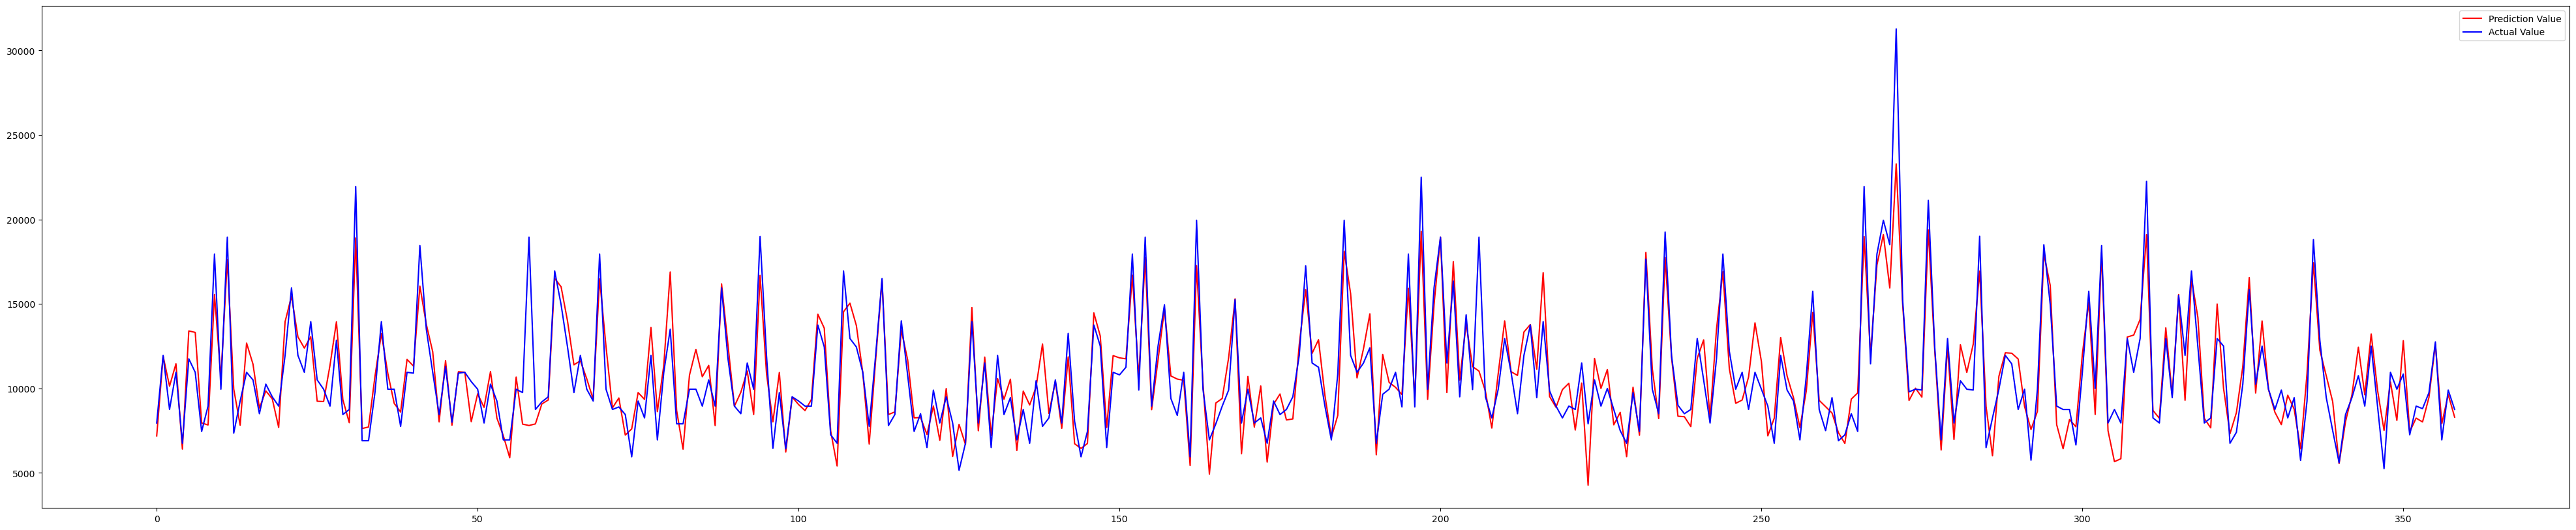

In [13]:
plt.figure(figsize=(50,10))
plt.plot(y_pred,color = 'red',label = 'Prediction Value')
plt.plot(y_test,color = 'blue',label = 'Actual Value')
plt.legend()
plt.show()

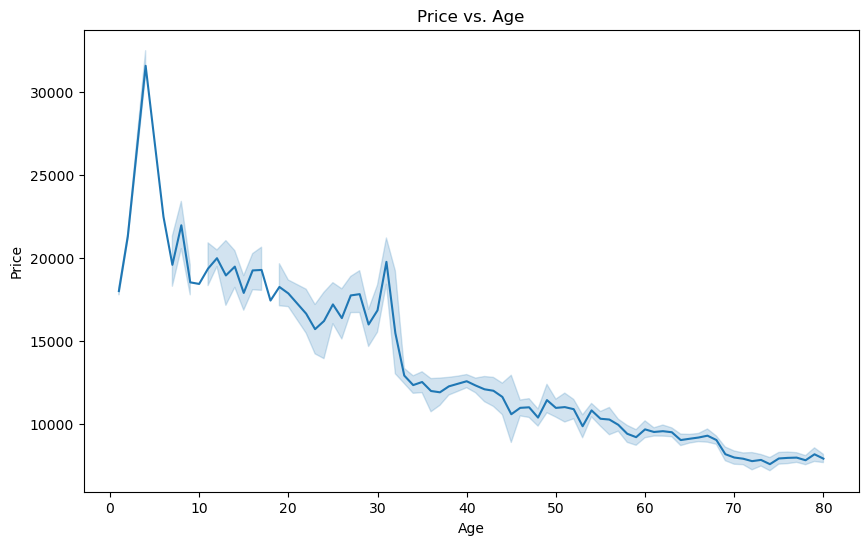

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age_08_04', y='Price', data=df)
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Price vs. Age')
plt.show()

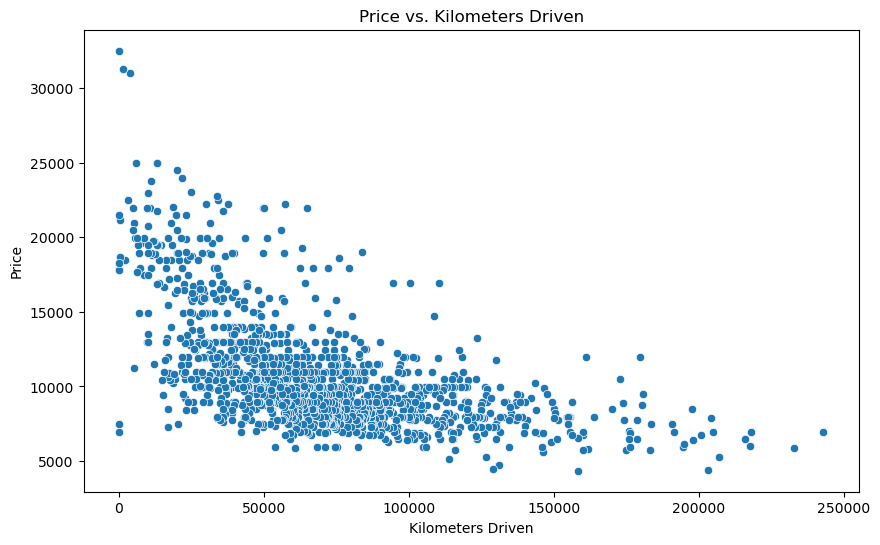

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='KM', y='Price', data=df)
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.title('Price vs. Kilometers Driven')
plt.show()

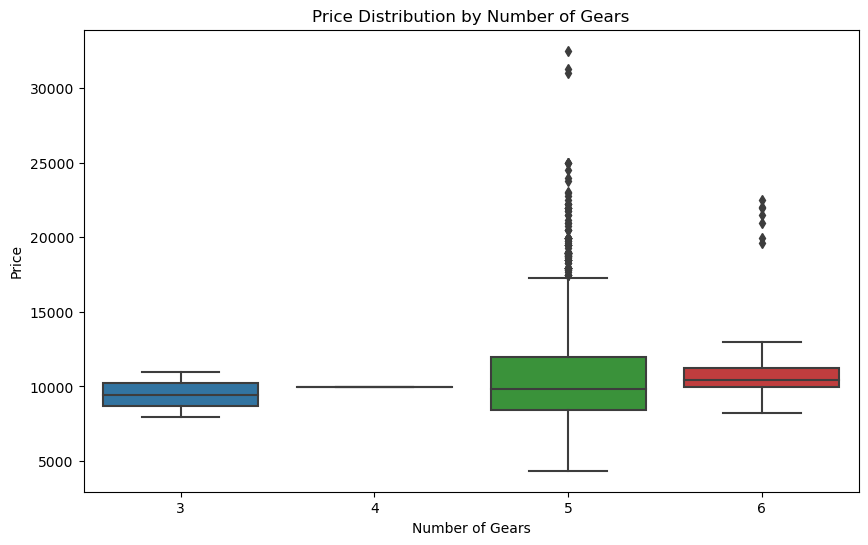

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gears', y='Price', data=df)
plt.xlabel('Number of Gears')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Gears')
plt.show()

C:\Users\Yash\anaconda1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


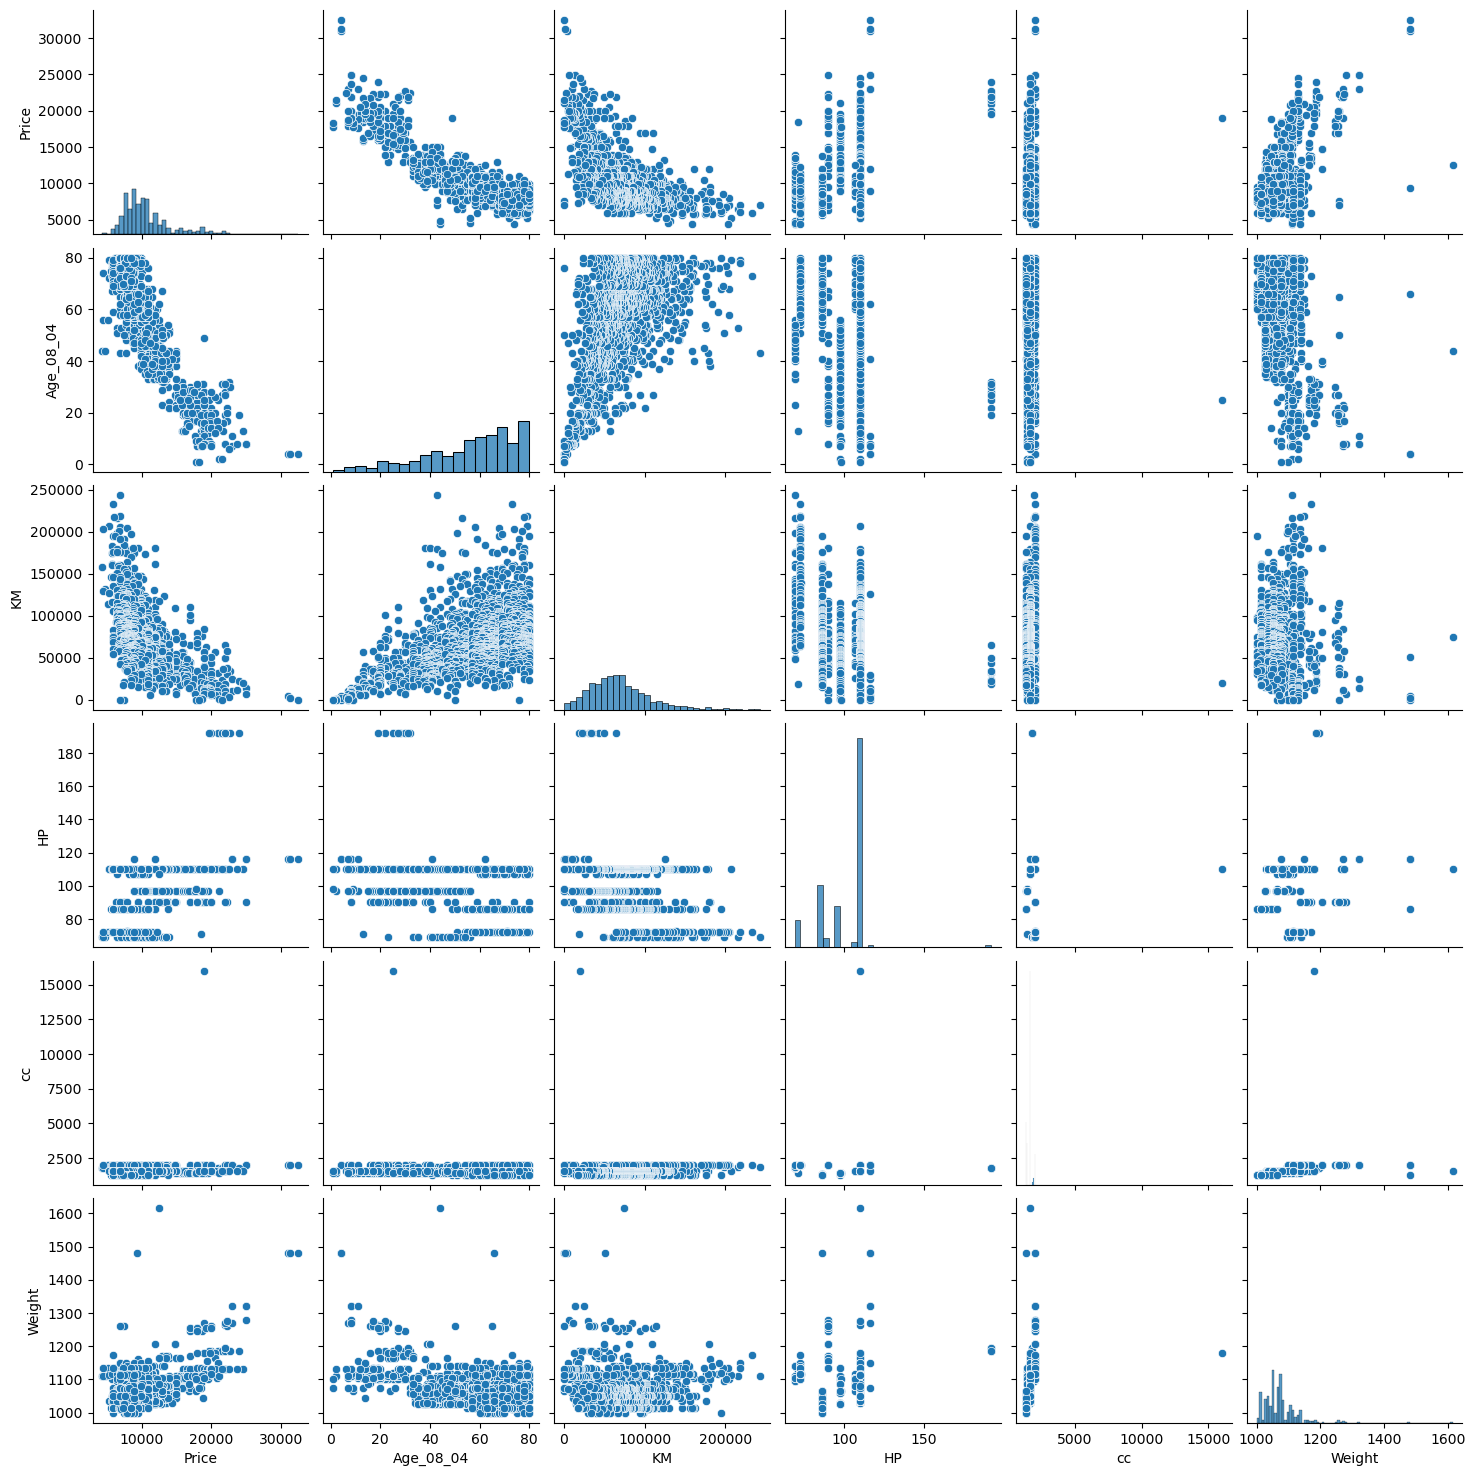

In [17]:
sns.pairplot(df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']])
plt.show()

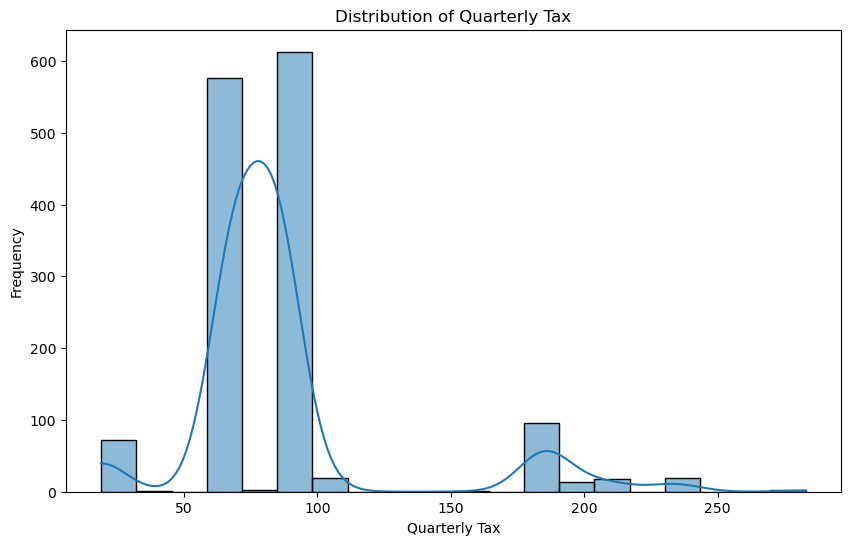

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Quarterly_Tax'], bins=20, kde=True)
plt.xlabel('Quarterly Tax')
plt.ylabel('Frequency')
plt.title('Distribution of Quarterly Tax')
plt.show()

In [19]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, 0:1]

In [20]:
X = sm.add_constant(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
model = sm.OLS(y_train, X_train).fit()

In [23]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("VIF:")
print(vif_data)

VIF:
         Feature         VIF
0          const  863.740319
1      Age_08_04    1.648606
2             KM    1.701176
3             HP    1.318322
4             cc    1.111539
5          Doors    1.081857
6          Gears    1.079493
7  Quarterly_Tax    1.505166


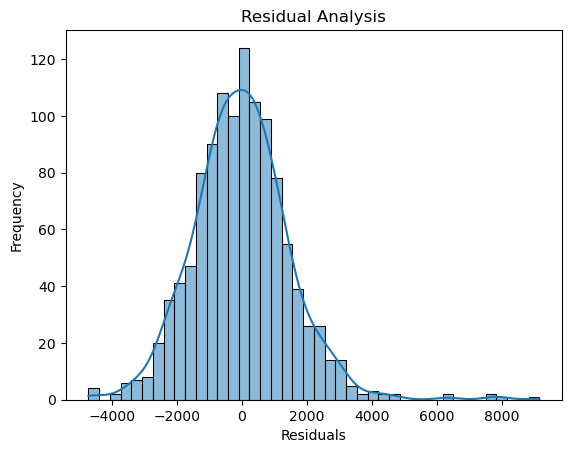

In [24]:
# Residual analysis
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Analysis')
plt.show()

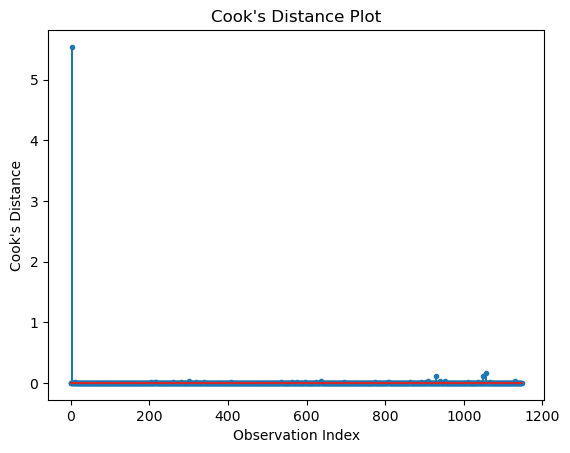

In [25]:
# Model Deletion Diagnostics - Cook's Distance
influence = model.get_influence()
cooks_distance = influence.cooks_distance[0]
plt.stem(np.arange(len(cooks_distance)), cooks_distance, markerfmt=".")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

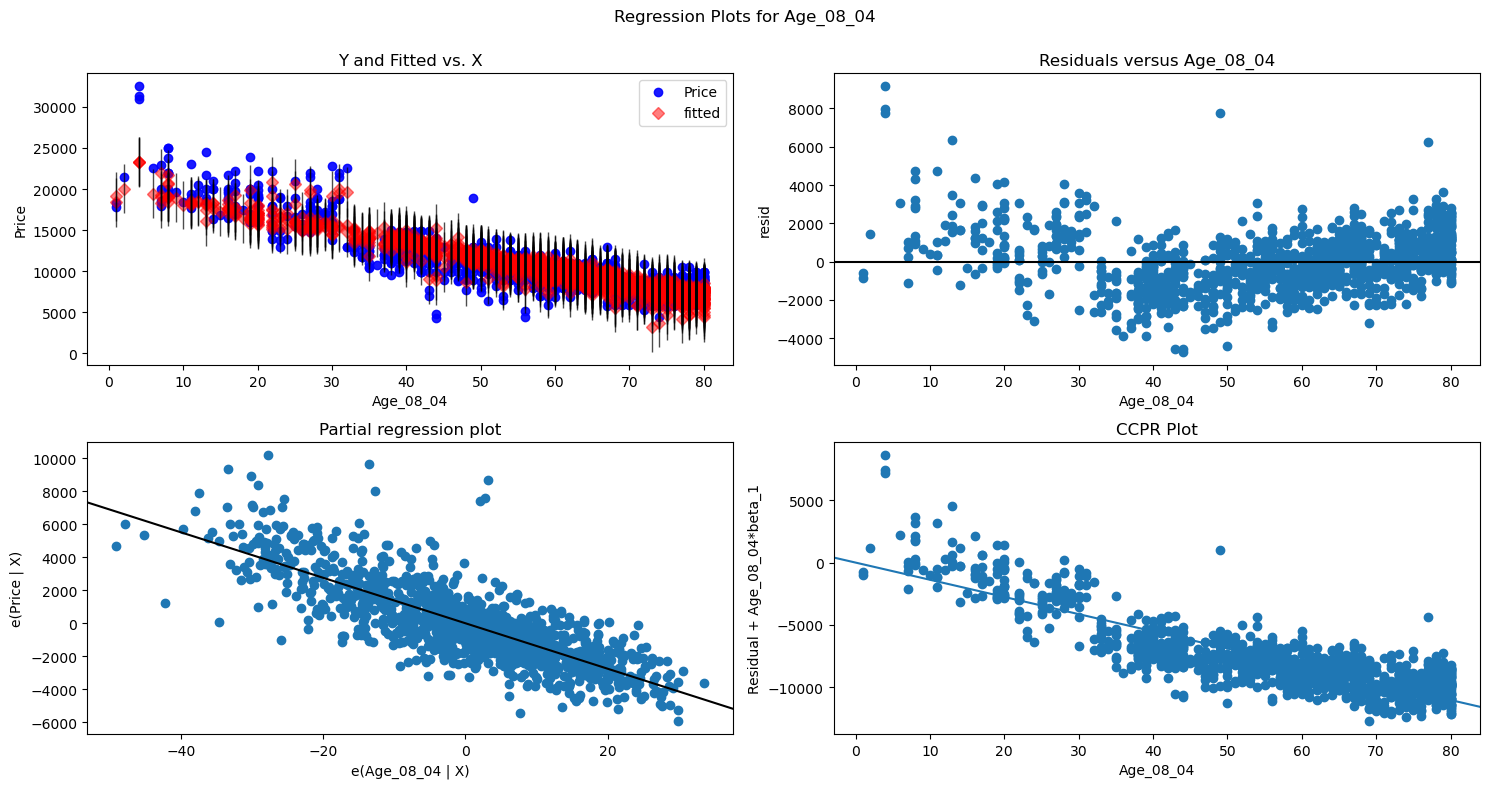

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()

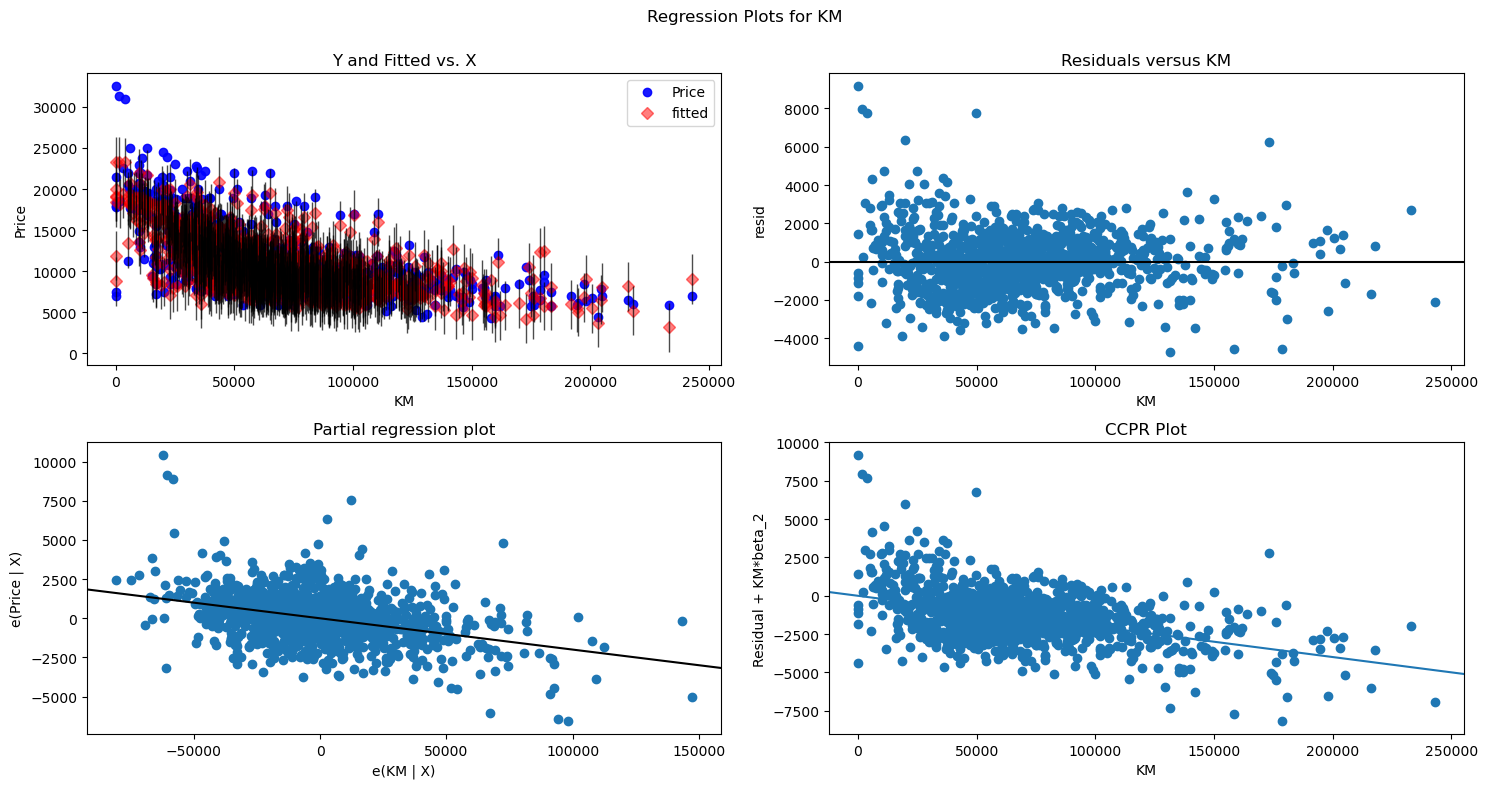

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

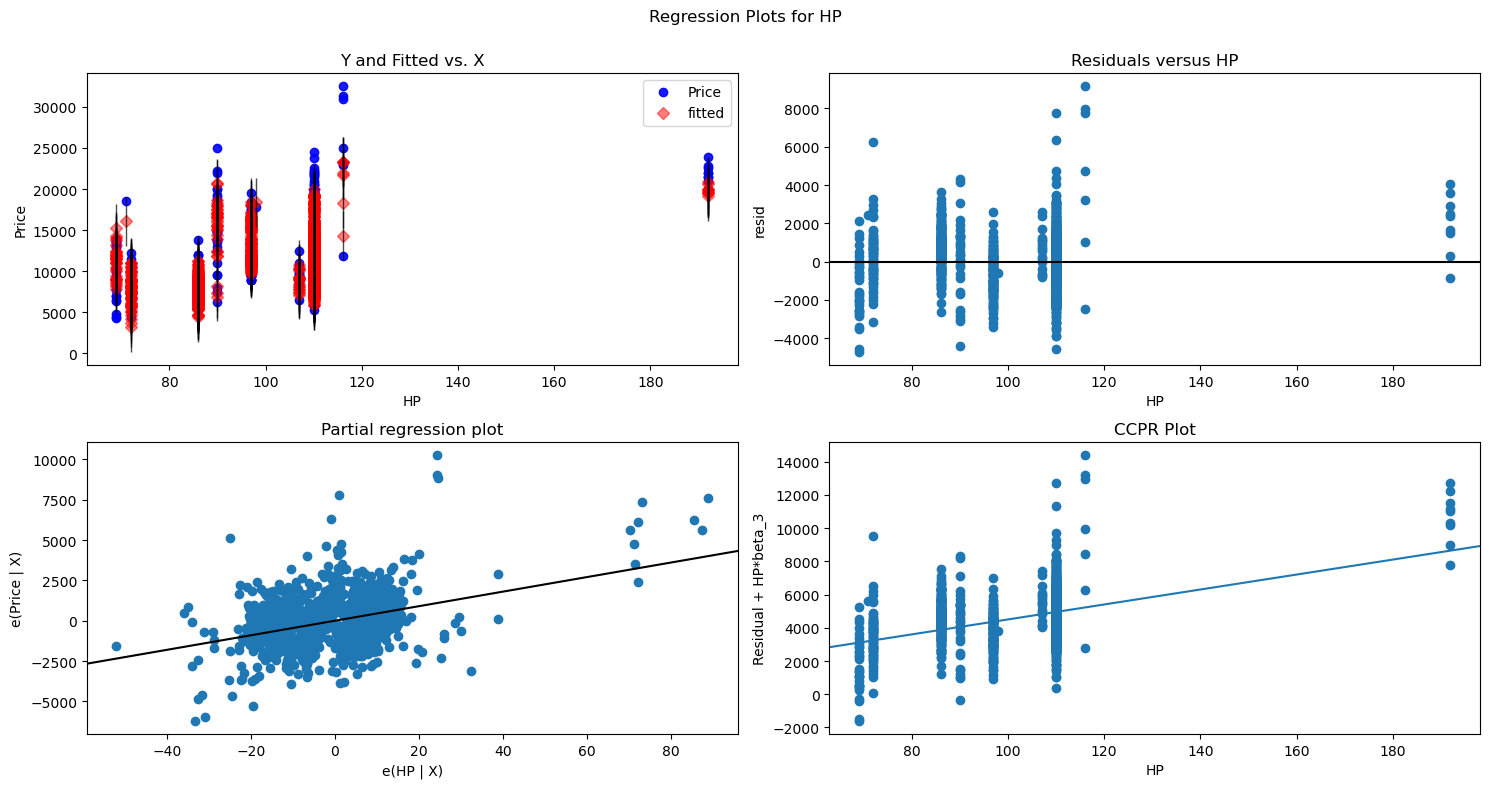

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

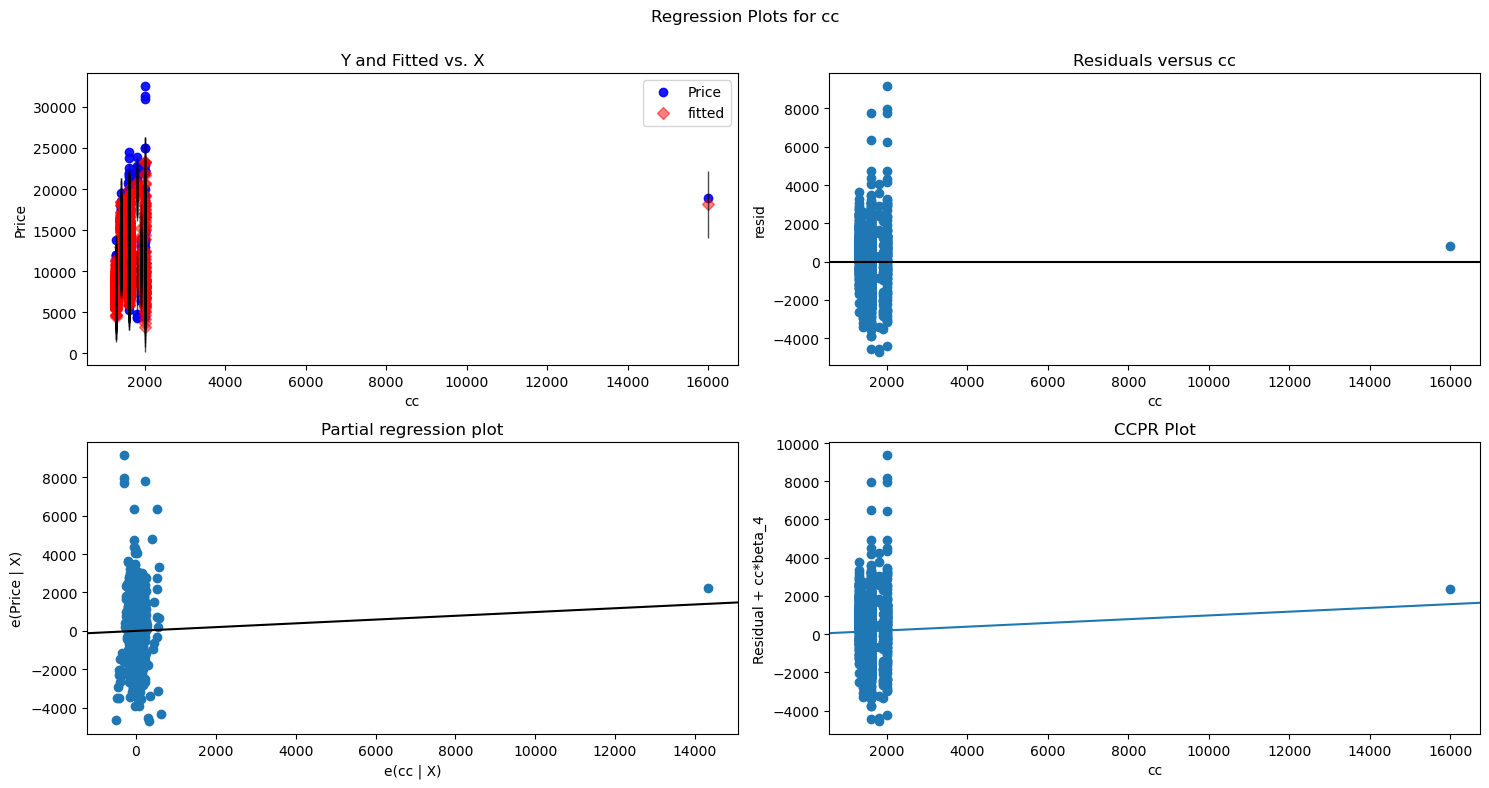

In [36]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

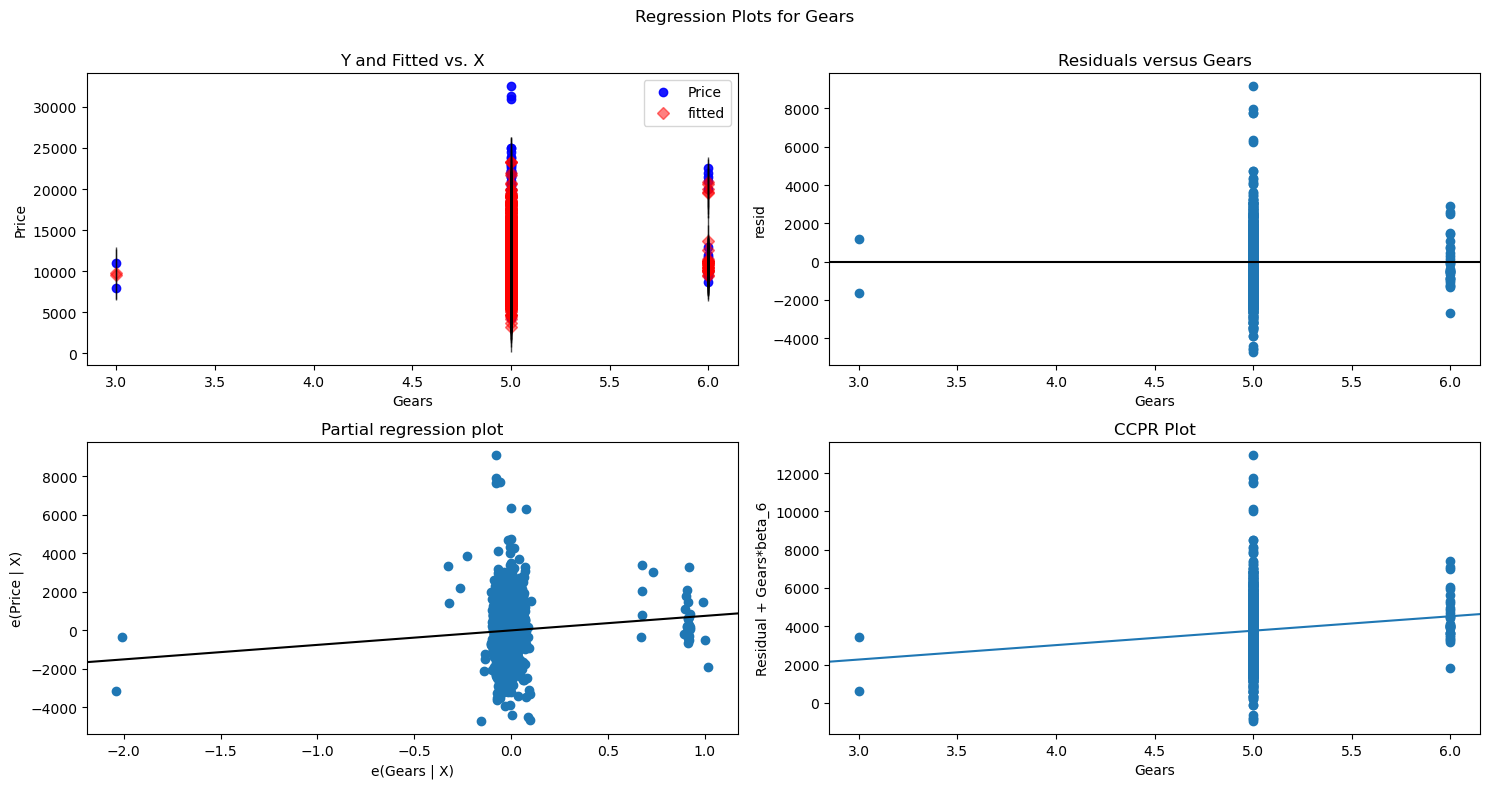

In [37]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

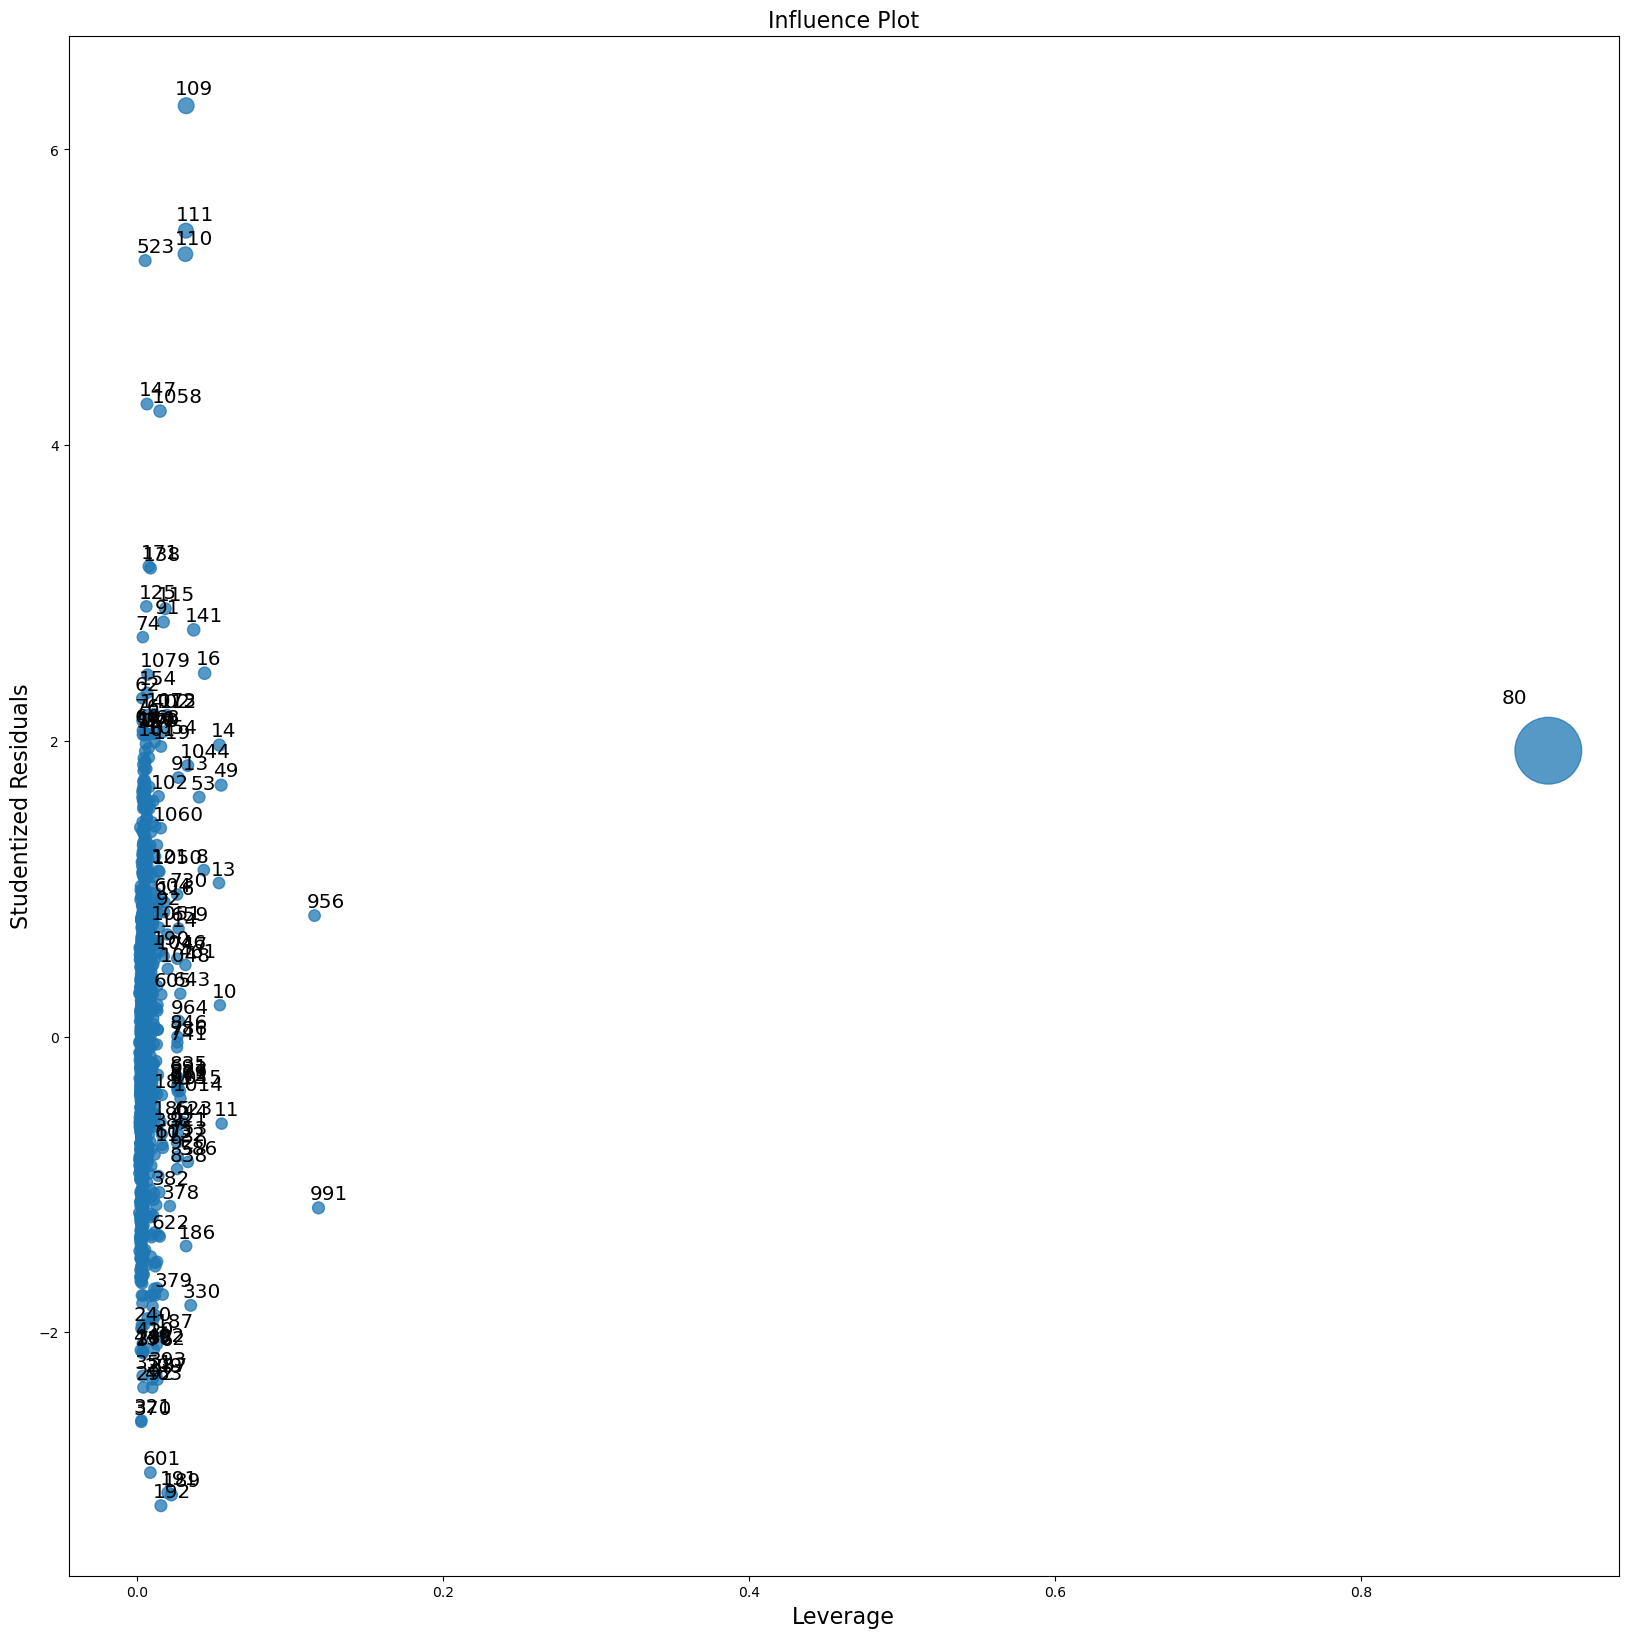

In [41]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [43]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020891364902506964

In [44]:
df[df.index.isin([80])] 

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [46]:
(c,_)=model.get_influence().cooks_distance
c

array([1.16e-04, 1.27e-03, 1.62e-04, ..., 8.24e-04, 2.14e-05, 7.94e-06])

In [48]:
import statsmodels.formula.api as smf

In [53]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=df).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df=df.drop(df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df
else:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=df).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8888522335939621


In [57]:
print('The R-Squared value if the model is: ',final_model.rsquared)

The R-Squared value if the model is:  0.8888522335939621
